In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/dataset.csv.zip"

Archive:  /content/drive/MyDrive/dataset.csv.zip
  inflating: dataset.csv             


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import StrMethodFormatter
#from colorama import Fore, Style
#from dython.nominal import associations

import lightgbm
import xgboost
#import catboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.config import list_physical_devices
from tensorflow.random import set_seed
set_seed(42)

%matplotlib inline

In [4]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,over.react,...,weight.gain,material.possessions,introvert,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,Disorder
0,yes,yes,yes,yes,yes,yes,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Anxiety
1,no,no,no,no,no,no,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,Depression
2,no,no,no,no,no,no,no,no,no,no,...,yes,yes,yes,no,no,no,no,no,no,Loneliness
3,no,no,no,no,no,no,no,no,no,no,...,no,no,no,yes,yes,yes,yes,yes,yes,Stress
4,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,Normal


In [5]:
df.columns

Index(['feeling.nervous', 'panic', 'breathing.rapidly', 'sweating',
       'trouble.in.concentration', 'having.trouble.in.sleeping',
       'having.trouble.with.work', 'hopelessness', 'anger', 'over.react',
       'change.in.eating', 'suicidal.thought', 'feeling.tired', 'close.friend',
       'social.media.addiction', 'weight.gain', 'material.possessions',
       'introvert', 'popping.up.stressful.memory', 'having.nightmares',
       'avoids.people.or.activities', 'feeling.negative',
       'trouble.concentrating', 'blamming.yourself', 'Disorder'],
      dtype='object')

In [6]:
df = df.rename(columns={
    "feeling.nervous":"nervous",
    "panic":"panic",
    "breathing.rapidly":"breat_rap",
    "sweating" : "sweating",
    "trouble.in.concentration" : "concent",
    "hopelessness":"hopeless",
    'having.trouble.in.sleeping':'trouble_sleep',
    'having.trouble.with.work' : 'work',
    'hopelessness':'hopeless',
    'anger' : 'anger',
    'over.react' : 'ov_react',
    'change.in.eating' : 'eat',
    'suicidal.thought' : 'suicid',
    'feeling.tired' : 'tired',
    'close.friend' : 'cf',
    'social.media.addiction' : 'sosmed_adict',
    'weight.gain': 'weight_gain',
    'material.possessions':'posses',
    'introvert':'introvert',
    'popping.up.stressful.memory':'stressfull',
    'having.nightmares':'nightmares',
    'avoids.people.or.activities':'avoid_people',
    'feeling.negative':'feeling_negatif',
    'trouble.concentrating':'trouble_concentration',
    'blamming.yourself':'blaming_self'
    })

In [7]:
df['Disorder'].unique()

array(['Anxiety', 'Depression', 'Loneliness', 'Stress', 'Normal'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40960 entries, 0 to 40959
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nervous                40960 non-null  object
 1   panic                  40960 non-null  object
 2   breat_rap              40960 non-null  object
 3   sweating               40960 non-null  object
 4   concent                40960 non-null  object
 5   trouble_sleep          40960 non-null  object
 6   work                   40960 non-null  object
 7   hopeless               40960 non-null  object
 8   anger                  40960 non-null  object
 9   ov_react               40960 non-null  object
 10  eat                    40960 non-null  object
 11  suicid                 40960 non-null  object
 12  tired                  40960 non-null  object
 13  cf                     40960 non-null  object
 14  sosmed_adict           40960 non-null  object
 15  weight_gain        

In [9]:
df.describe(include='all').T

,count,unique,top,freq
nervous,40960,2,no,32768
panic,40960,2,no,32768
breat_rap,40960,2,no,32768
sweating,40960,2,no,32768
concent,40960,2,no,32768
trouble_sleep,40960,2,no,32768
work,40960,2,no,32768
hopeless,40960,2,no,32768
anger,40960,2,no,32768
ov_react,40960,2,no,32768


In [10]:
df.count()

nervous                  40960
panic                    40960
breat_rap                40960
sweating                 40960
concent                  40960
trouble_sleep            40960
work                     40960
hopeless                 40960
anger                    40960
ov_react                 40960
eat                      40960
suicid                   40960
tired                    40960
cf                       40960
sosmed_adict             40960
weight_gain              40960
posses                   40960
introvert                40960
stressfull               40960
nightmares               40960
avoid_people             40960
feeling_negatif          40960
trouble_concentration    40960
blaming_self             40960
Disorder                 40960
dtype: int64

In [12]:
Anxiety, Depression, Loneliness, Stress, Normal = df['Disorder'].value_counts(normalize=True)*100
Anxiety, Depression, Loneliness, Stress, Normal

(20.0, 20.0, 20.0, 20.0, 20.0)

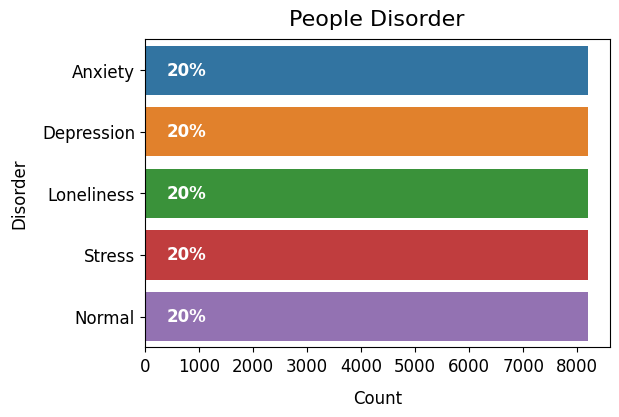

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(y='Disorder', data=df)
plt.xlabel(xlabel='Count', fontsize=12, labelpad=10)
plt.ylabel(ylabel='Disorder', fontsize=12, labelpad=10)
plt.text(x=400, y=0, s=str(int(np.round(Anxiety))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.text(x=400, y=1, s=str(int(np.round(Depression))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.text(x=400, y=2, s=str(int(np.round(Loneliness))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.text(x=400, y=3, s=str(int(np.round(Stress))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.text(x=400, y=4, s=str(int(np.round(Normal))) + "%", fontsize=12, fontweight='bold', color='w', va='center')
plt.title(label='People Disorder', fontsize=16, pad=10)
plt.tick_params(axis='both', labelsize=12);

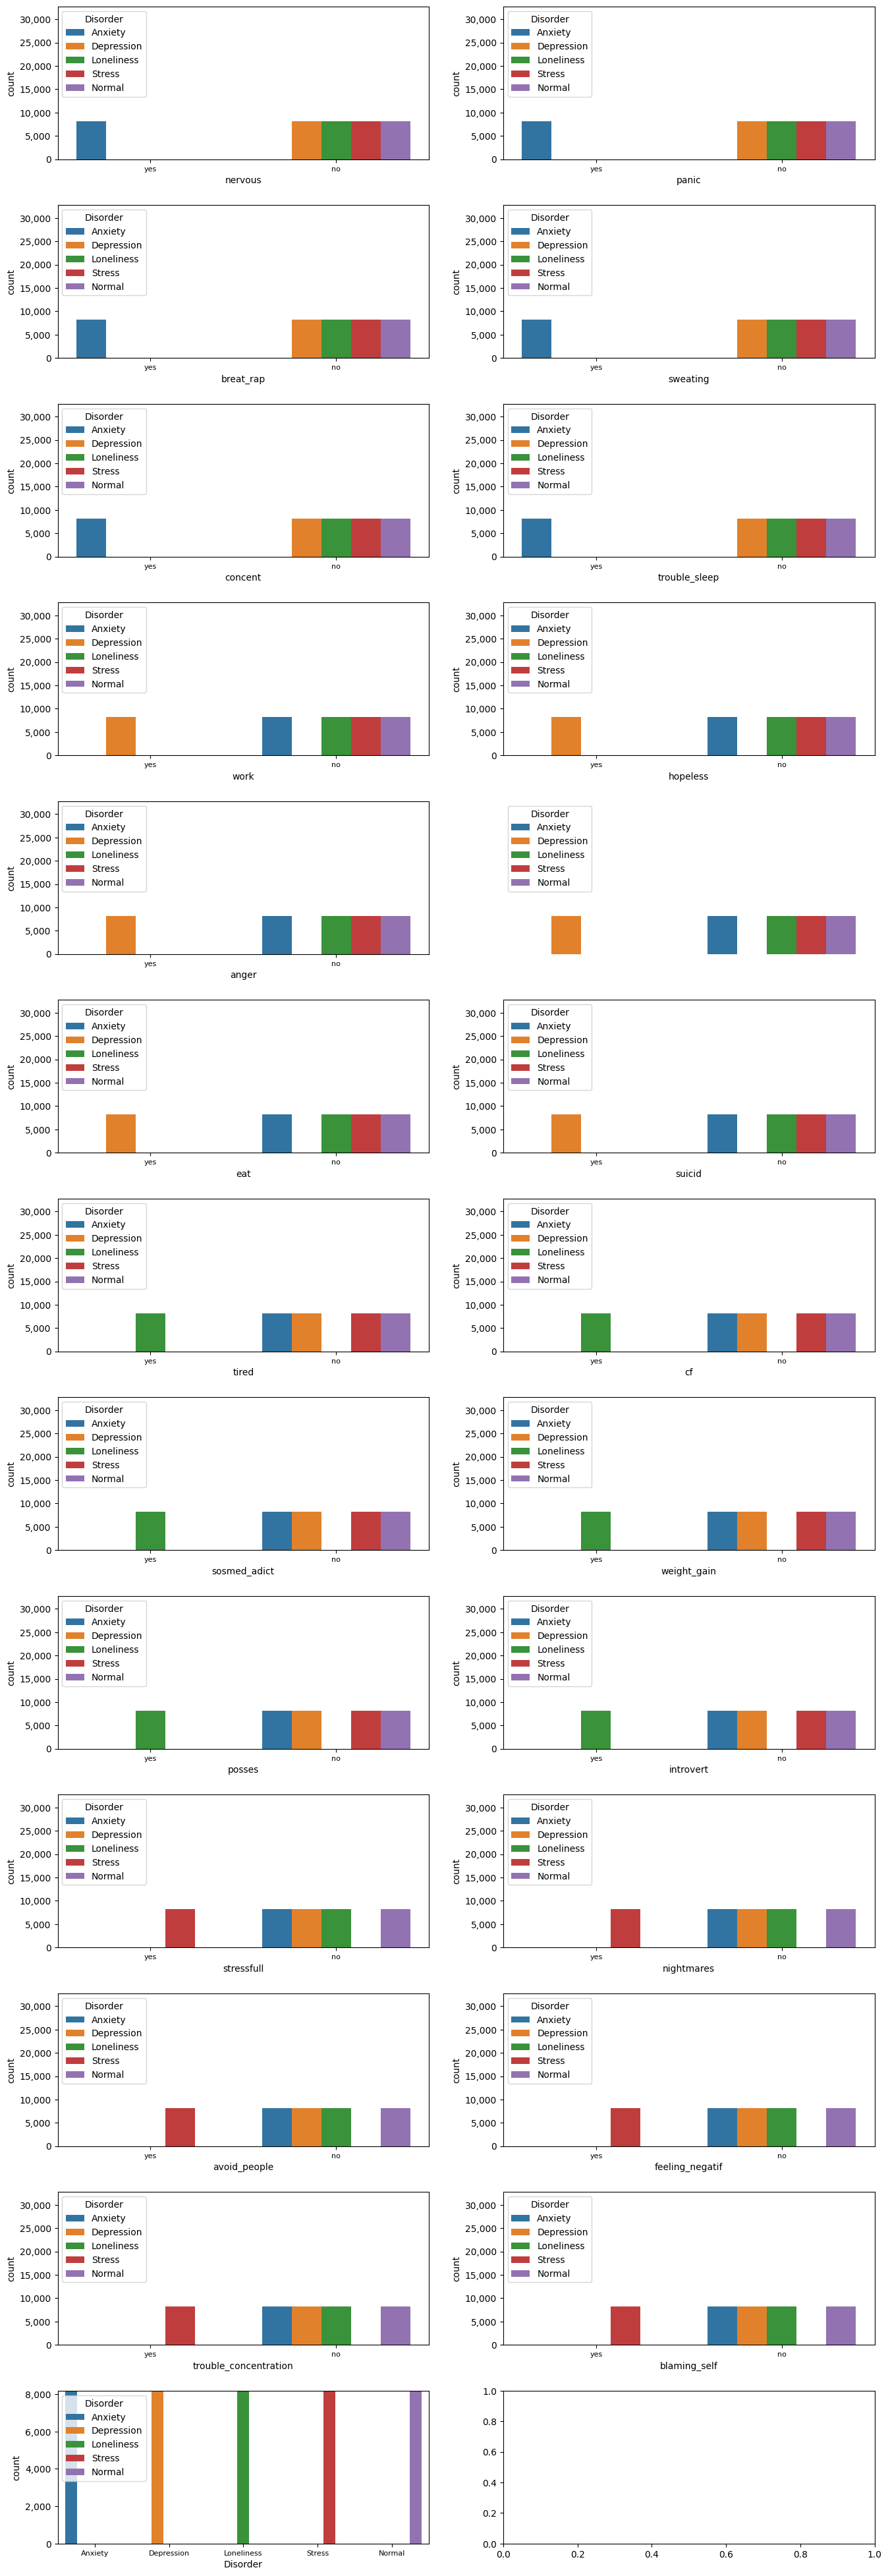

In [14]:
fig, axes = plt.subplots(13,2, figsize=(16,50), sharey=False)
axes[4,1].set_axis_off()

for name, ax in zip(df.columns, axes.flatten()):
  sns.countplot(x=name, hue='Disorder', data=df, order=df[name].value_counts(ascending=True).index, ax=ax)
  ax.tick_params(axis='x', labelsize=8)
  ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
  ax.set_ylim([0, max(df[name].value_counts())])
  ax.legend(title='Disorder', loc='upper left')
  plt.subplots_adjust(hspace=0.3);

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Disorder']=le.fit_transform(df['Disorder'])

In [17]:
df['Disorder'].unique()

array([0, 1, 2, 4, 3])

In [18]:
Y = df['Disorder']
X = df.drop('Disorder', axis=1)

In [19]:
X = X.replace({'yes': 1, 'no': 0})

In [20]:
X.head()

,nervous,panic,breat_rap,sweating,concent,trouble_sleep,work,hopeless,anger,ov_react,...,sosmed_adict,weight_gain,posses,introvert,stressfull,nightmares,avoid_people,feeling_negatif,trouble_concentration,blaming_self
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X.to_csv('raw_data.csv', index=False)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [22]:
print('Training Features shape:', x_train.shape)
print('Test Features shape:', x_test.shape)
print('Training Labels shape:', y_train.shape)
print('Testing Labels shape:', y_test.shape)

Training Features shape: (30720, 24)
Test Features shape: (10240, 24)
Training Labels shape: (30720,)
Testing Labels shape: (10240,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
#training the support vector Machine Classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
# accuracy score on the training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [28]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [30]:
# accuracy score on the test data
X_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [44]:
df.columns


Index(['nervous', 'panic', 'breat_rap', 'sweating', 'concent', 'trouble_sleep',
       'work', 'hopeless', 'anger', 'ov_react', 'eat', 'suicid', 'tired', 'cf',
       'sosmed_adict', 'weight_gain', 'posses', 'introvert', 'stressfull',
       'nightmares', 'avoid_people', 'feeling_negatif',
       'trouble_concentration', 'blaming_self', 'Disorder'],
      dtype='object')

In [47]:
input_data = (1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
  print('The person is Anxiety')
elif(prediction[0]==1):
  print('The person is Depression')
elif(prediction[0]==2):
  print('The Person is Loneliness')
elif(prediction[0]==3):
  print('The Person is Normal')
elif(prediction[0]==4):
  print('The Person is Stress')

[4]
The Person is Stress


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [43]:
import pickle
filename = 'mental_disorder_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [41]:
# loading the saved model
loaded_model = pickle.load(open('mental_disorder_model.sav', 'rb'))

In [42]:
input_data = (0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==0):
  print('The person is Anxiety')
elif(prediction[0]==1):
  print('The person is Depression')
elif(prediction[0]==2):
  print('The Person is Loneliness')
elif(prediction[0]==3):
  print('The Person is Normal')
elif(prediction[0]==4):
  print('The Person is Setress')

[2]
The Person is Loneliness


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
